# Angular Grids

This example illustrates how to perform surface integrals over the sphere using the [angular](../pyapi/grid.angular.rst#grid.angular.AngularGrid) grid module in Grid.

The angular grids supported currently are the Lebedev-Laikov grid and the symmetric spherical t-design grid.  Either grids
can be specified by the degree or the number of points in the grid. The degree is defined here to be the
maximum angular degree $l$ of the real spherical harmonics $Y_{lm}$ that the grid can integrate accurately.

#### Initialization of angular grids

Angular grids can be initialized in three ways:
1. By specifying the degree of the grid
2. By specifying the number of points in the grid
3. By specifying the grid points and weights directly


In [1]:
from grid.angular import AngularGrid

# The grid with closest degree to a specified degree is found:
degree = 28
ang_grid_ll = AngularGrid(degree=degree)
ang_grid_ss = AngularGrid(degree=degree,use_spherical=True)
print(f"Specified degree is {degree} but actual degree of the angular grid is:")
print(f"  - {ang_grid_ll.degree} for the Levedev-Laikov grid")
print(f"  - {ang_grid_ss.degree} for the symmetric spherical grid")
print("")

# The number of points of the symmetric spherical grid is different from the 
# Levedev-Laikov grid for the same degree:
print(f"Number of points of the Levedev-Laikov grid: {ang_grid_ll.size}")
print(f"Number of points of the symmetric spherical grid: {ang_grid_ss.size}")
print("")

# Rather than degree, the number of points can be specified
size = 300
ang_grid_ll = AngularGrid(size=size)
print(f"Specified number of points (Levedev-Laikov grid) is: {size}")
# points of the angular grid is:")
print(f"Actual number of points of the angular grid {ang_grid_ll.size}")
print("")

# The angular grid can be specified from the points and weights:
points = ang_grid_ll.points
weights = ang_grid_ll.weights
ang_grid_pts = AngularGrid(points=points,weights=weights)
print(f"Angular grid was set from {ang_grid_pts.size} points and weights")
print(f"This grid has not specified degree!!!")

Specified degree is 28 but actual degree of the angular grid is:
  - 29 for the Levedev-Laikov grid
  - 29 for the symmetric spherical grid

Number of points of the Levedev-Laikov grid: 302
Number of points of the symmetric spherical grid: 438

Specified number of points (Levedev-Laikov grid) is: 300
Actual number of points of the angular grid 302

Angular grid was set from 302 points and weights
This grid has not specified degree!!!


The angular grid points are distributed across on the unit-sphere $S^2$, i.e. points are normalized to one.

Norm of Levedev-Laikov grid points is all one: True
Norm of symmetric spherical grid points is all one: True


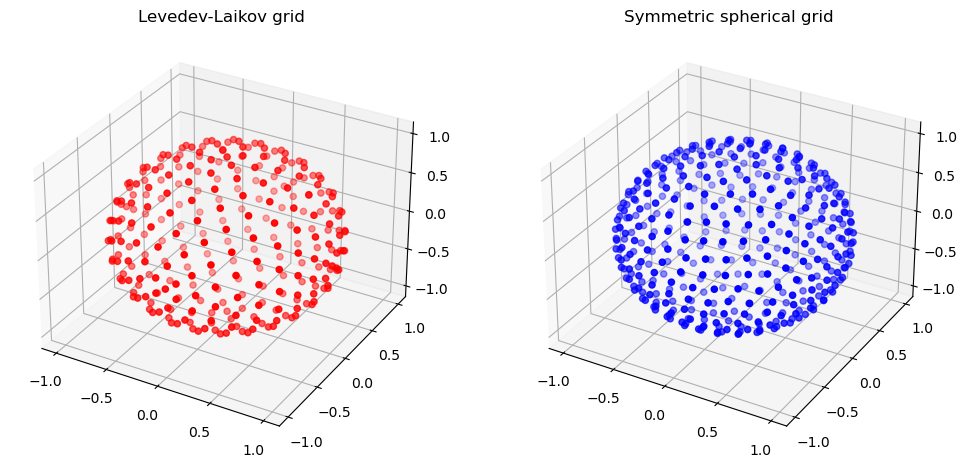

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Angular grid points are on the unit sphere.
norm_ll = np.linalg.norm(ang_grid_ll.points, axis=1)
norm_ss = np.linalg.norm(ang_grid_ss.points, axis=1)
print(f"Norm of Levedev-Laikov grid points is all one: {np.all(np.abs(norm_ll - 1.0) < 1e-8)}")
print(f"Norm of symmetric spherical grid points is all one: {np.all(np.abs(norm_ss - 1.0) < 1e-8)}")

# Plot of the angular grid points of the Levedev-Laikov grid
fig = plt.figure(figsize=(12, 6))

# Customize the ticks for the x, y, and z axes for the entire figure
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('Levedev-Laikov grid')
x, y, z = ang_grid_ll.points.T
ax1.scatter(x, y, z, c='r', marker='o')

# Plot of the angular grid points of the symmetric spherical grid
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('Symmetric spherical grid')
x, y, z = ang_grid_ss.points.T
ax2.scatter(x, y, z, c='b', marker='o')

xticks = yticks = zticks = np.arange(-1.0, 1.1, 0.5)
for ax in fig.axes:
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_zticks(zticks)
plt.show()

#### Integral of Identity Function

The integral of the identity function over the unit-sphere $S^2$ is $4 \pi$:

$$
\int_{S^2} d\Sigma = \int_{0}^{2\pi} \int_0^{\pi} \sin(\phi) d\theta d\phi = 2 \pi \int_0^{\pi} \sin(\phi) d\phi = 4 \pi
$$


In [3]:
# Integrate over Levedev-Laikov grid
integrand = np.ones(ang_grid_ll.size)
integral_ll = ang_grid_ll.integrate(integrand)

# Integrate over symmetric spherical grid
integrand = np.ones(ang_grid_ss.size)
integral_ss = ang_grid_ss.integrate(integrand)

print(f"Integral over Levedev-Laikov grid: {integral_ll}"
      f" should be close to 4 pi ({np.round(4 * np.pi, 6)}.)")
print(f"Integral over symmetric spherical grid: {integral_ss}"
      f" should be close to 4 pi ({np.round(4 * np.pi, 6)}.)")

Integral over Levedev-Laikov grid: 12.566370614358753 should be close to 4 pi (12.566371.)
Integral over symmetric spherical grid: 12.56637061435914 should be close to 4 pi (12.566371.)


#### Integral of Spherical Harmonic Function

The real spherical harmonic functions $Y_{lm}$ integrates to zero unless when $l=0, m=0$:

$$
\begin{align*}
    \int_{0}^{2\pi} \int_0^{\pi} Y_{00}(\theta, \phi) \sin(\phi) d\theta d\phi &= \sqrt{4 \pi}  \\
    \int_{0}^{2\pi} \int_0^{\pi} Y_{lm}(\theta, \phi) \sin(\phi) d\theta d\phi &= 0
\end{align*}
$$


In [4]:
from grid.utils import convert_cart_to_sph, generate_real_spherical_harmonics

# Convert from cartesian to spherical (theta, phi) coordinates, Levedev-Laikov grid
_, theta_ll, phi_ll = convert_cart_to_sph(ang_grid_ll.points).T
# Convert from cartesian to spherical (theta, phi) coordinates, symmetric spherical grid
_, theta_ss, phi_ss = convert_cart_to_sph(ang_grid_ss.points).T

print("Levedev-Laikov grid:")
print(f"Minimum {np.min(theta_ll)} and Maximum {np.max(theta_ll)} of theta coordinate")
print(f"Minimum {np.min(phi_ss)} and Maximum {np.max(phi_ll)} of phi coordinate \n")

print("Symmetric spherical grid:")
print(f"Minimum {np.min(theta_ss)} and Maximum {np.max(theta_ss)} of theta coordinate")
print(f"Minimum {np.min(phi_ss)} and Maximum {np.max(phi_ss)} of phi coordinate \n")


# Generate all spherical harmonics up to order l=2
sph_harmonics_ll = generate_real_spherical_harmonics(2, theta_ll, phi_ll)
sph_harmonics_ss = generate_real_spherical_harmonics(2, theta_ss, phi_ss)

# Orders are:
orders = [[0, 0], [1, 0], [1, 1], [1, -1], [2, 0], [2, 1], [2, -1], [2, 2], [2, -2]]

# Calculate the integral of each spherical harmonic over the angular grid
results_all =[]
for i, sph_harm in orders:
    integral_ll = ang_grid_ll.integrate(sph_harmonics_ll[i])
    integral_ss = ang_grid_ss.integrate(sph_harmonics_ss[i])
    results_all.append([(i,sph_harm), integral_ll, integral_ss])

# Print the results in a table
table_width = 82
width = 25
divide = "|"
title_ll = "Levedev-Laikov grid"
title_ss = "Symmetric spherical grid"
print("Results of the integration of the spherical harmonics over the angular grid")
print("-"*table_width)
print(f"{divide:<{width}} {divide}{title_ll:>{width}} {divide} {title_ss:>{width}} {divide}")
print("-"*table_width)
for i in results_all:
    sph_harm = f"Y_{i[0]}"
    print(f"{divide}{sph_harm:^{width}}{divide}{i[1]:>{width}.16f} {divide} {i[2]:>{width}.16f} {divide}")
print("-"*table_width)

Levedev-Laikov grid:
Minimum -3.044810534956229 and Maximum 3.141592653589793 of theta coordinate
Minimum 0.0 and Maximum 3.141592653589793 of phi coordinate 

Symmetric spherical grid:
Minimum -3.141592653589793 and Maximum 3.1265941085262927 of theta coordinate
Minimum 0.0 and Maximum 3.141592653589793 of phi coordinate 

Results of the integration of the spherical harmonics over the angular grid
----------------------------------------------------------------------------------
|                         |      Levedev-Laikov grid |  Symmetric spherical grid |
----------------------------------------------------------------------------------
|        Y_(0, 0)         |       3.5449077018109114 |        3.5449077018110318 |
|        Y_(1, 0)         |       0.0000000000000000 |       -0.0000000000000001 |
|        Y_(1, 1)         |       0.0000000000000000 |       -0.0000000000000001 |
|        Y_(1, -1)        |       0.0000000000000000 |       -0.0000000000000001 |
|        Y_(2, 0)

#### Spherical Harmonics Are Orthonormal

The following showcases that the real spherical harmonics implemented in grid are orthonormal i.e.

$$ \int_{0}^{2\pi} \int_0^{\pi} Y_{l_1, m_1}(\theta, \phi)  Y_{l_2, m_2}(\theta, \phi)  \sin(\phi) d\theta d\phi = \delta_{l_1, l_2}\cdot \delta_{m_1, m_2}$$


In [5]:
width = 10
results_all =[]
for idx_1, i in enumerate(sph_harmonics_ll):
    for idx_2, j in list(enumerate(sph_harmonics_ll))[idx_1:]:
        results_all.append([orders[idx_1], orders[idx_2], ang_grid_ll.integrate(i * j)])

# Print the results
for i, j, integral_ll in results_all:
    print(f"Integral of Y{i} * Y{j} over the angular grid is: {integral_ll}")


Integral of Y[0, 0] * Y[0, 0] over the angular grid is: 0.9999999999999659
Integral of Y[0, 0] * Y[1, 0] over the angular grid is: 1.4099922198231897e-17
Integral of Y[0, 0] * Y[1, 1] over the angular grid is: 7.703764655277862e-19
Integral of Y[0, 0] * Y[1, -1] over the angular grid is: 3.86839947011039e-18
Integral of Y[0, 0] * Y[2, 0] over the angular grid is: 1.0151520466253339e-16
Integral of Y[0, 0] * Y[2, 1] over the angular grid is: -4.1160507280638657e-19
Integral of Y[0, 0] * Y[2, -1] over the angular grid is: -1.7999450129153882e-21
Integral of Y[0, 0] * Y[2, 2] over the angular grid is: 1.2027867851011065e-17
Integral of Y[0, 0] * Y[2, -2] over the angular grid is: -6.656408415997919e-18
Integral of Y[1, 0] * Y[1, 0] over the angular grid is: 0.9999999999999661
Integral of Y[1, 0] * Y[1, 1] over the angular grid is: -3.2176664083822734e-19
Integral of Y[1, 0] * Y[1, -1] over the angular grid is: -6.352747104407253e-22
Integral of Y[1, 0] * Y[2, 0] over the angular grid is: 